# Import necessary libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
# Save/Load Model
import joblib

### Load The Dataset

In [85]:
sd=pd.read_csv(r'D:\Machine Learning\Spam Detection\Spam Detection .csv') 

## Exploratory Data Analysis

### Display dataset

In [86]:
sd.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Shape of Dataset

In [87]:
print("Dataset Shape:")
print(f"Total rows: {sd.shape[0]}")
print(f"Total columns: {sd.shape[1]}")

Dataset Shape:
Total rows: 4601
Total columns: 58


### type of column

In [88]:
print("Feature Types:")
print(sd.dtypes)

Feature Types:
word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float

### Description of Dataset

In [89]:
sd.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601.0,0.104553,0.305358,0.0,0.000,0.000,0.000,4.540
word_freq_address,4601.0,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
word_freq_all,4601.0,0.280656,0.504143,0.0,0.000,0.000,0.420,5.100
word_freq_3d,4601.0,0.065425,1.395151,0.0,0.000,0.000,0.000,42.810
word_freq_our,4601.0,0.312223,0.672513,0.0,0.000,0.000,0.380,10.000
word_freq_over,4601.0,0.095901,0.273824,0.0,0.000,0.000,0.000,5.880
word_freq_remove,4601.0,0.114208,0.391441,0.0,0.000,0.000,0.000,7.270
word_freq_internet,4601.0,0.105295,0.401071,0.0,0.000,0.000,0.000,11.110
word_freq_order,4601.0,0.090067,0.278616,0.0,0.000,0.000,0.000,5.260
word_freq_mail,4601.0,0.239413,0.644755,0.0,0.000,0.000,0.160,18.180


### Target Column Distribution

In [90]:
counts = sd['spam'].value_counts()
print( counts)

spam
0    2788
1    1813
Name: count, dtype: int64


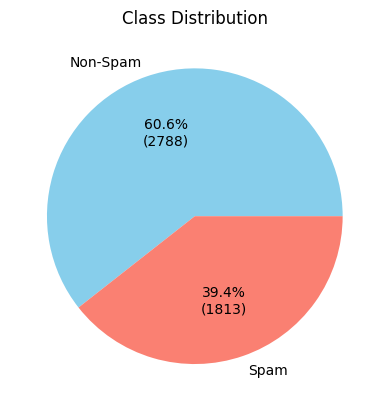

In [91]:
def autopct_format(pct):
    total = sum(counts)
    val = int(round(pct * total / 100.0))
    return '{:.1f}%\n({:d})'.format(pct, val)

# Plot
counts.plot.pie(
    autopct=autopct_format,
    labels=['Non-Spam', 'Spam'],
    colors=['skyblue', 'salmon']
)
plt.title('Class Distribution')
plt.ylabel('')
plt.show()


### Missing Values in Each Column

In [92]:
print(sd.isnull().sum())

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

### Feature Distribution(Histogram)

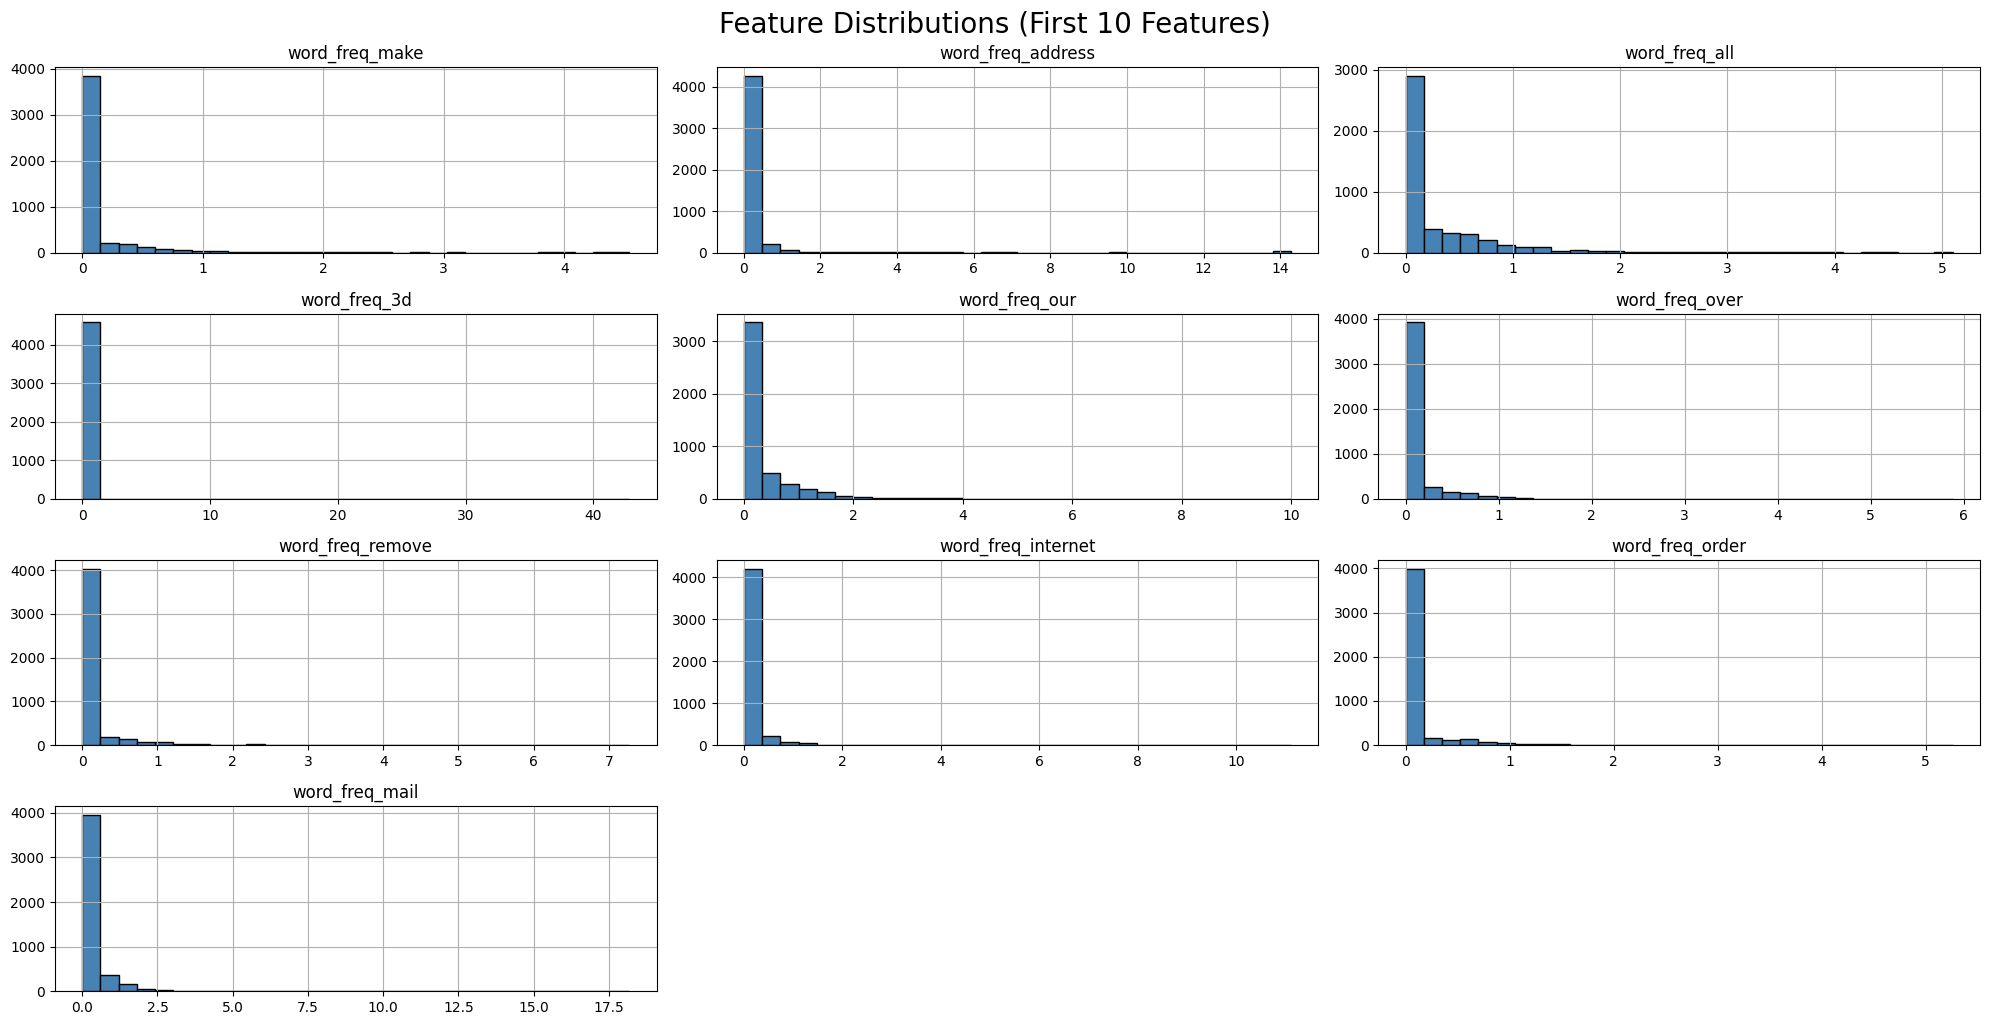

In [93]:
# Select only the first 10 features (excluding 'spam')
sd.drop('spam', axis=1).iloc[:, :10].hist(bins=30, figsize=(20, 10), color='steelblue', edgecolor='black')

plt.tight_layout()
plt.suptitle('Feature Distributions (First 10 Features)', fontsize=20, y=1.02)
plt.show()


### Outlier Detection

In [94]:
# Select only numerical columns
numeric_sd = sd.select_dtypes(include=['float64', 'int64'])

# IQR-based Outlier Detection
outlier_indices = set()

for col in numeric_sd.columns:
    Q1 = numeric_sd[col].quantile(0.25)
    Q3 = numeric_sd[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = numeric_sd[(numeric_sd[col] < lower_bound) | (numeric_sd[col] > upper_bound)].index
    outlier_indices.update(outliers)


### Correlation Analysis

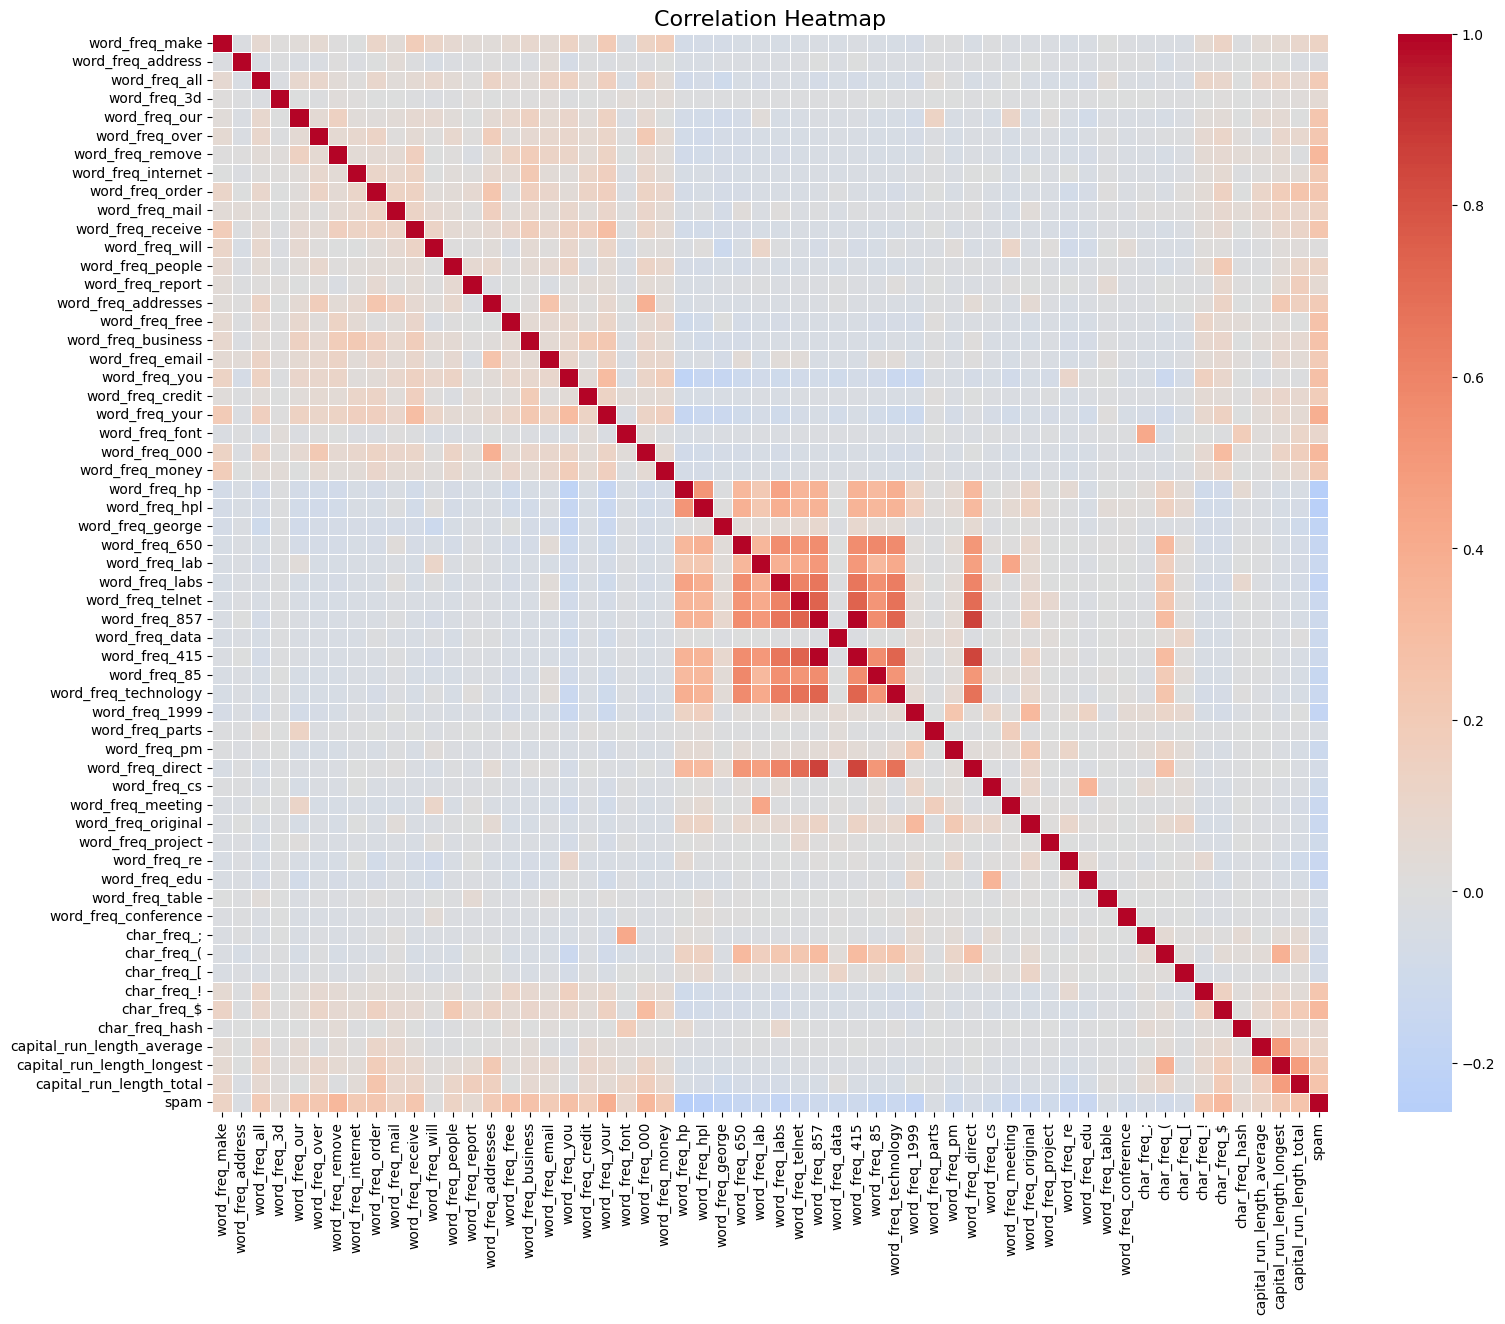

In [95]:
# Compute correlation matrix (including target column)
corr_matrix = sd.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(18, 14))  # Adjust size as needed
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### Data Split

In [96]:
# Split features and target
X = sd.drop('spam', axis=1)
y = sd['spam']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
# Class distribution check
print("Train class balance:\n", y_train.value_counts(normalize=True))
print("Test class balance:\n", y_test.value_counts(normalize=True))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure consistent columns in train/test
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


Train shape: (3680, 57)
Test shape: (921, 57)
Train class balance:
 spam
0    0.605978
1    0.394022
Name: proportion, dtype: float64
Test class balance:
 spam
0    0.605863
1    0.394137
Name: proportion, dtype: float64


### Feature scaling

In [97]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


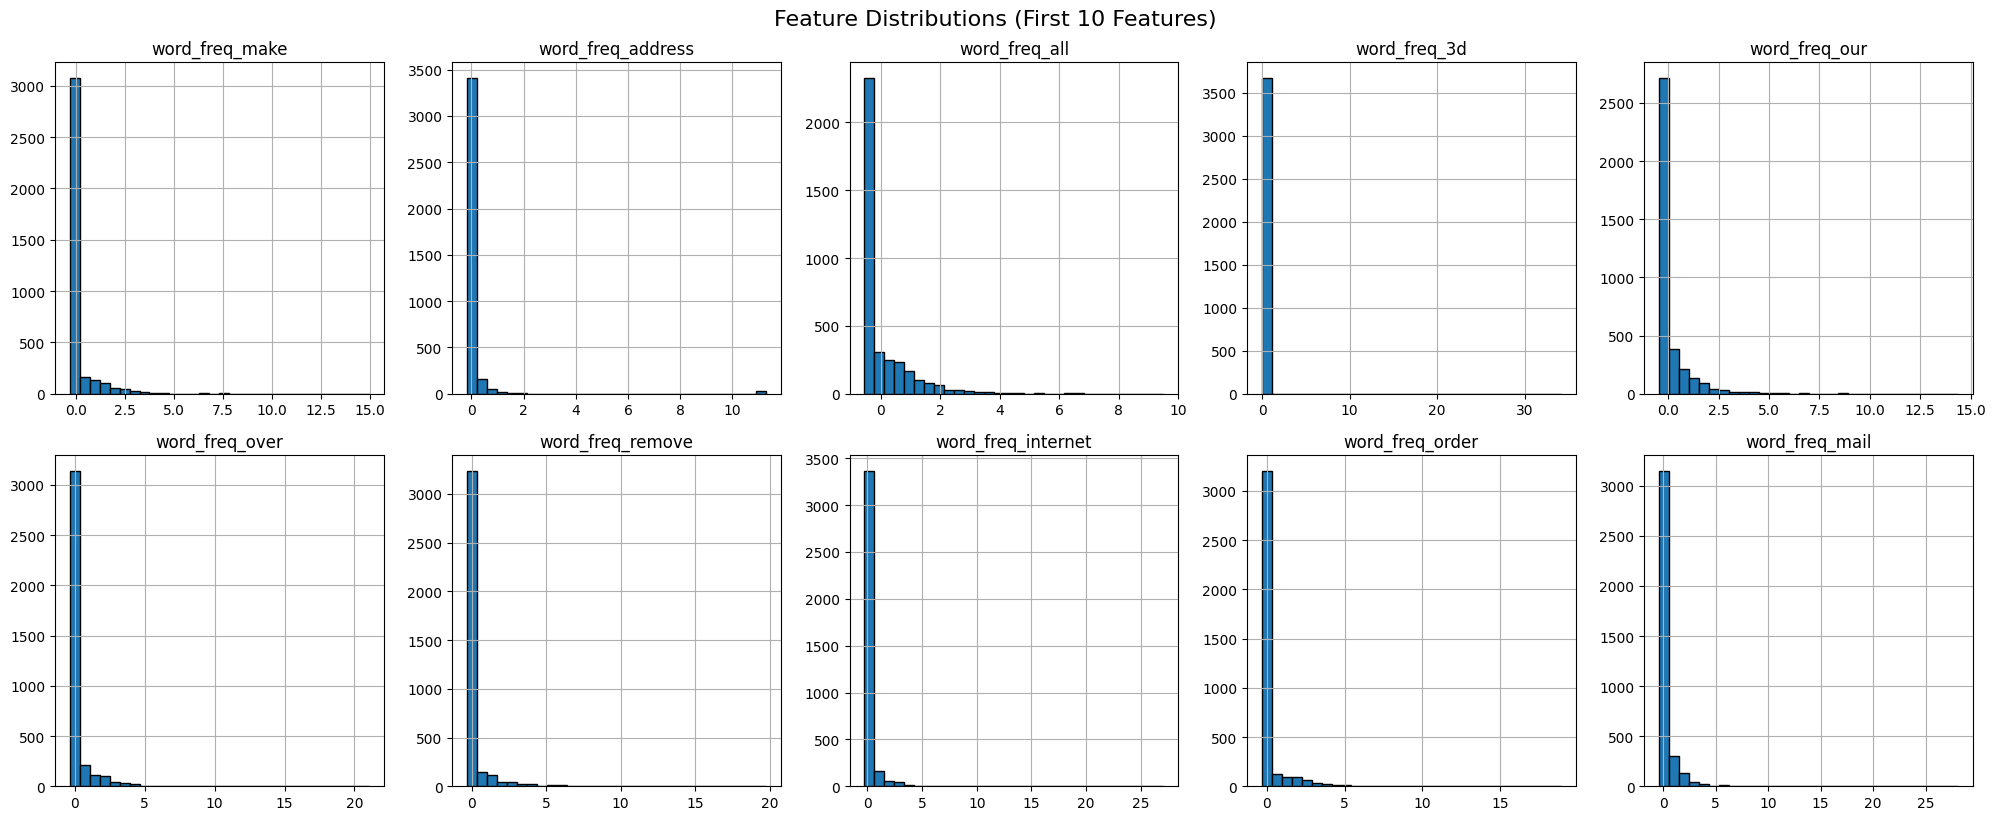

In [98]:
# Convert scaled data back to DataFrame for plotting
X_train_scaled_sd = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Plot histograms of only the first 10 features
X_train_scaled_sd.iloc[:, :10].hist(
    figsize=(20, 8),     # Adjust figure size for 10 features
    bins=30,             # Number of bins in each histogram
    layout=(2, 5),       # 2 rows, 5 columns layout
    edgecolor='black'
)

plt.tight_layout()
plt.suptitle('Feature Distributions (First 10 Features)', fontsize=16, y=1.02)
plt.show()


# Model Training & Testing

### SVM

Before Feature Selection:
Accuracy : 0.9261672095548317
Precision: 0.9351351351351351
Recall   : 0.8871794871794871
F1 Score : 0.9105263157894737


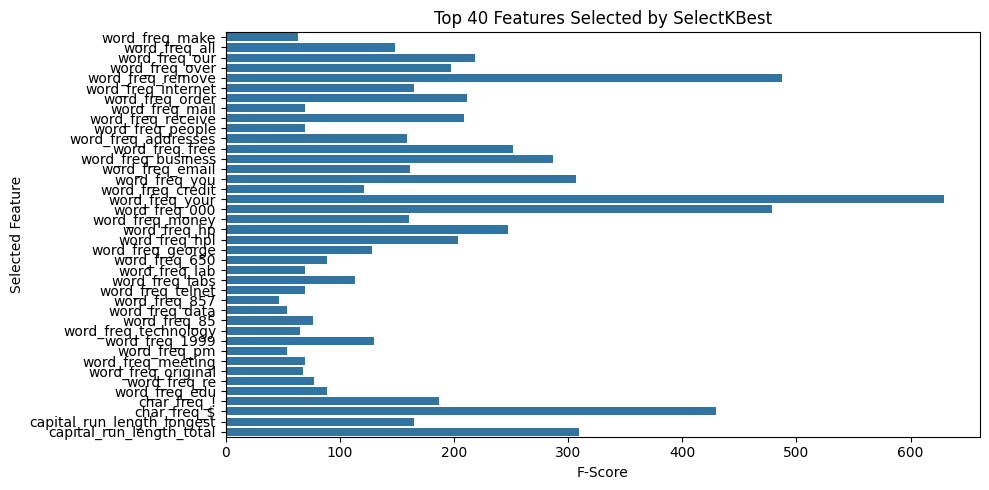

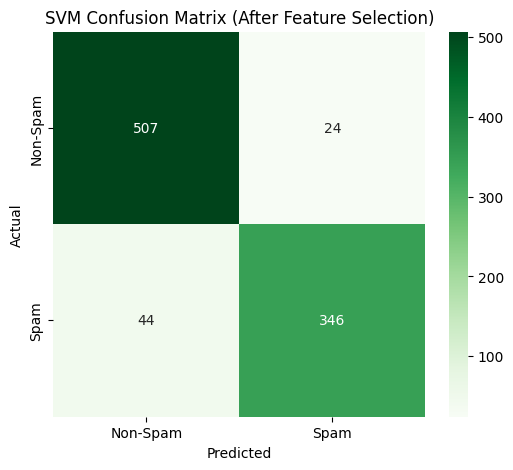

After Feature Selection:
Accuracy : 0.9185667752442996
Precision: 0.9338842975206612
Recall   : 0.8692307692307693
F1 Score : 0.900398406374502


In [99]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_scaled_sd, y_train)
svm_pred = svm_model.predict(X_test_scaled)


# Metrics before feature selection
print("Before Feature Selection:")
print("Accuracy :", accuracy_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred))
print("Recall   :", recall_score(y_test, svm_pred))
print("F1 Score :", f1_score(y_test, svm_pred))


#  ================= FEATURE SELECTION (SelectKBest) =================

# Select
 
selector = SelectKBest(score_func=f_classif, k=40)
X_train_selected = selector.fit_transform(X_train_scaled_sd, y_train)  # use y_train here
X_test_selected = selector.transform(X_test_scaled)  

# Get selected feature names
mask = selector.get_support()
selected_features = X.columns[mask]

# Visualize feature scores
feature_scores = selector.scores_[mask]
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_scores, y=selected_features)
plt.xlabel("F-Score")
plt.ylabel("Selected Feature")
plt.title(f"Top {40} Features Selected by SelectKBest")
plt.tight_layout()
plt.show()


# Retrain SVM
svm_model_sel = SVC(kernel='linear', probability=True, random_state=42)
svm_model_sel.fit(X_train_selected, y_train)
svm_pred_sel = svm_model_sel.predict(X_test_selected)

# Confusion Matrix
cm_sel = confusion_matrix(y_test, svm_pred)
labels = ['Non-Spam', 'Spam'] 
plt.figure(figsize=(6, 5))
sns.heatmap(cm_sel, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title("SVM Confusion Matrix (After Feature Selection)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Metrics after feature selection
print("After Feature Selection:")
print("Accuracy :", accuracy_score(y_test, svm_pred_sel))
print("Precision:", precision_score(y_test, svm_pred_sel))
print("Recall   :", recall_score(y_test, svm_pred_sel))
print("F1 Score :", f1_score(y_test, svm_pred_sel))

### XGBoost

Before Feature Selection:
Accuracy : 0.9565689467969598
Precision: 0.972972972972973
Recall   : 0.9230769230769231
F1 Score : 0.9473684210526315


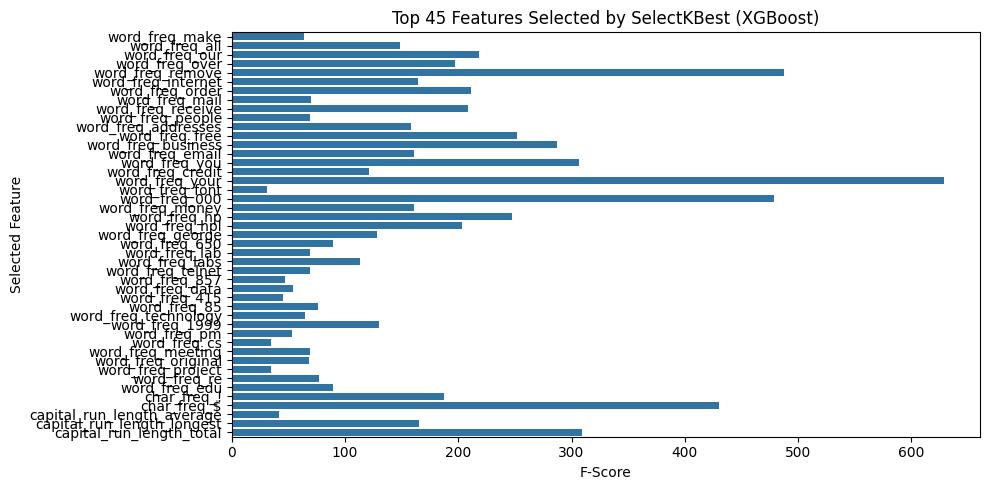

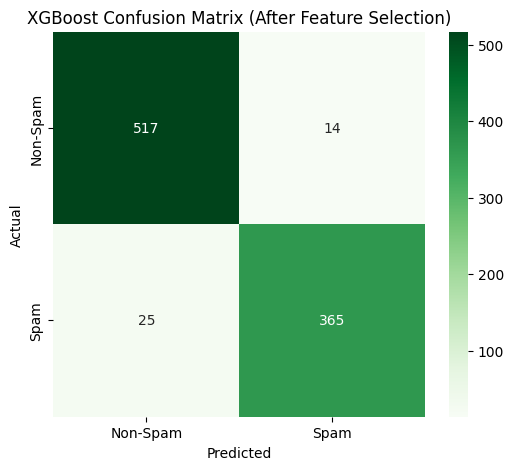

After Feature Selection:
Accuracy : 0.9576547231270358
Precision: 0.9630606860158312
Recall   : 0.9358974358974359
F1 Score : 0.9492847854356307


In [100]:
# ============ BEFORE FEATURE SELECTION ============

# Clean column names to be XGBoost-friendly
X_train_scaled_sd.columns = [col.replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in X_train_scaled_sd.columns]
X_test_scaled.columns = [col.replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in X_test_scaled.columns]

# Train XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled_sd, y_train)

# Predict
xgb_pred = xgb_model.predict(X_test_scaled)

# Metrics
print("Before Feature Selection:")
print("Accuracy :", accuracy_score(y_test, xgb_pred))
print("Precision:", precision_score(y_test, xgb_pred))
print("Recall   :", recall_score(y_test, xgb_pred))
print("F1 Score :", f1_score(y_test, xgb_pred))

# ============ FEATURE SELECTION ============

selector = SelectKBest(score_func=f_classif, k=45)
X_train_selected_xgb = selector.fit_transform(X_train_scaled_sd, y_train)
X_test_selected_xgb = selector.transform(X_test_scaled)

# Selected features
mask = selector.get_support()
selected_features_xgb = X_train_scaled_sd.columns[mask]
feature_scores_xgb = selector.scores_[mask]

# Plot feature scores
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_scores_xgb, y=selected_features_xgb)
plt.xlabel("F-Score")
plt.ylabel("Selected Feature")
plt.title(f"Top {45} Features Selected by SelectKBest (XGBoost)")
plt.tight_layout()
plt.show()

# ============ AFTER FEATURE SELECTION ============

# Retrain model
xgb_model_sel = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model_sel.fit(X_train_selected_xgb, y_train)

# Predict again
xgb_pred_sel = xgb_model_sel.predict(X_test_selected_xgb)

# Confusion Matrix
cm_sel = confusion_matrix(y_test, xgb_pred_sel)
labels = ['Non-Spam', 'Spam']  
plt.figure(figsize=(6, 5))
sns.heatmap(cm_sel, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix (After Feature Selection)')
plt.show()

# Metrics
print("After Feature Selection:")
print("Accuracy :", accuracy_score(y_test, xgb_pred_sel))
print("Precision:", precision_score(y_test, xgb_pred_sel))
print("Recall   :", recall_score(y_test, xgb_pred_sel))
print("F1 Score :", f1_score(y_test, xgb_pred_sel))


### Random Forest

Accuracy       : 0.9554831704668838
Precision      : 0.9754768392370572
Recall         : 0.9179487179487179
F1 Score       : 0.9458388375165125


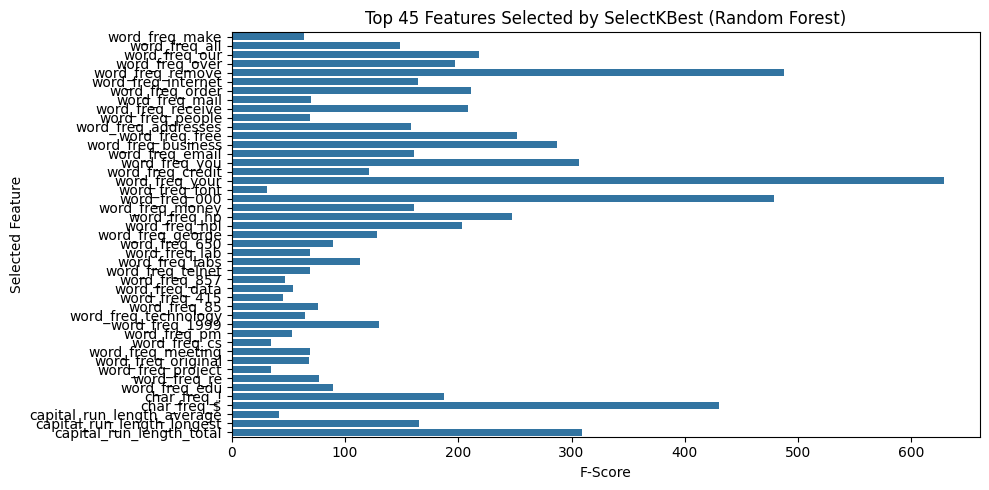

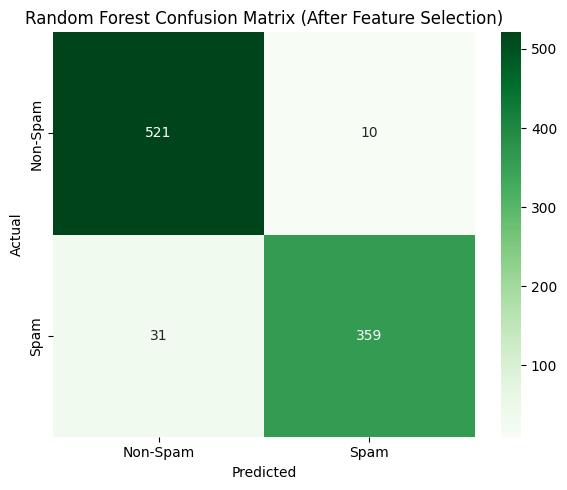

After Feature Selection:
Accuracy : 0.9554831704668838
Precision: 0.9728997289972899
Recall   : 0.9205128205128205
F1 Score : 0.9459815546772069


In [101]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled_sd, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test_scaled)

# Classification metrics
print("Accuracy       :", accuracy_score(y_test, rf_pred))
print("Precision      :", precision_score(y_test, rf_pred))
print("Recall         :", recall_score(y_test, rf_pred))
print("F1 Score       :", f1_score(y_test, rf_pred))
# ============ FEATURE SELECTION ============

# Use the same SelectKBest object to maintain consistency
selector = SelectKBest(score_func=f_classif, k=45)
X_train_selected_rf = selector.fit_transform(X_train_scaled_sd, y_train)
X_test_selected_rf = selector.transform(X_test_scaled)

# Get selected feature names for reference (optional)
mask_rf = selector.get_support()
selected_features_rf = X.columns[mask_rf]
feature_scores_rf = selector.scores_[mask_rf]

# Plot feature scores
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_scores_rf, y=selected_features_rf)
plt.xlabel("F-Score")
plt.ylabel("Selected Feature")
plt.title(f"Top {45} Features Selected by SelectKBest (Random Forest)")
plt.tight_layout()
plt.show()


# ============ RETRAIN RANDOM FOREST AFTER FEATURE SELECTION ============

# Train model
rf_model_sel = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_sel.fit(X_train_selected_rf, y_train)

# Make predictions
rf_pred_sel = rf_model_sel.predict(X_test_selected_rf)

# Confusion matrix
cm_rf_sel = confusion_matrix(y_test, rf_pred_sel)
labels = ['Non-Spam', 'Spam']

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf_sel, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix (After Feature Selection)')
plt.tight_layout()
plt.show()

# Classification metrics
print("After Feature Selection:")
print("Accuracy :", accuracy_score(y_test, rf_pred_sel))
print("Precision:", precision_score(y_test, rf_pred_sel))
print("Recall   :", recall_score(y_test, rf_pred_sel))
print("F1 Score :", f1_score(y_test, rf_pred_sel))



### Model Performance Comparison

### With All feature


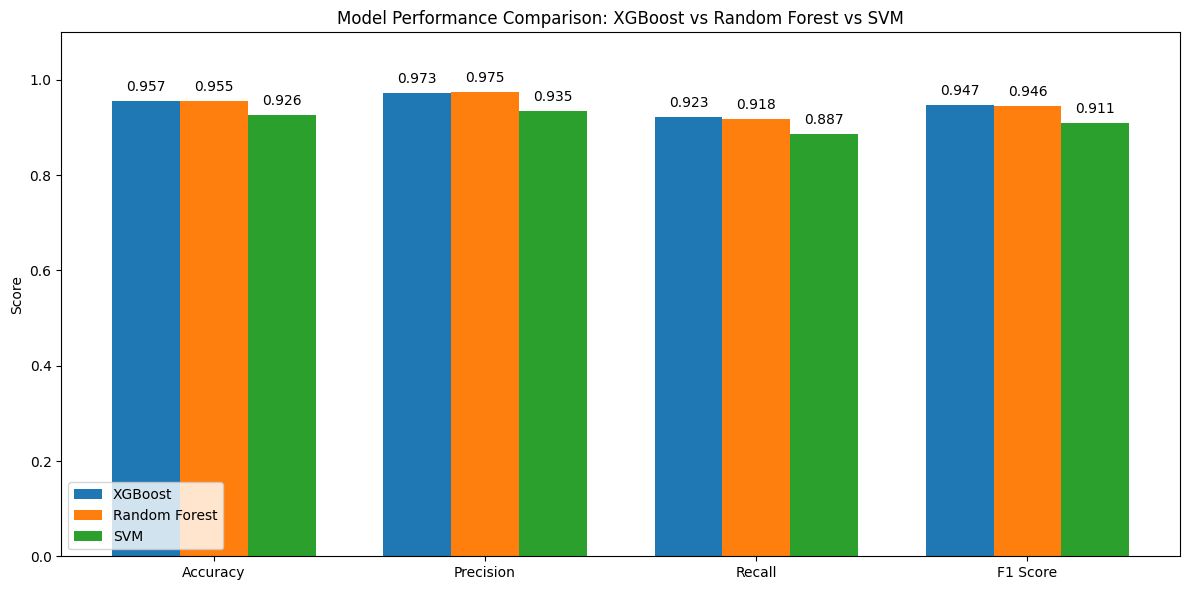

In [102]:
# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

svm_scores = [
    accuracy_score(y_test, svm_pred),
    precision_score(y_test, svm_pred),
    recall_score(y_test, svm_pred),
    f1_score(y_test, svm_pred)
]
rf_scores = [
    accuracy_score(y_test, rf_pred),
    precision_score(y_test, rf_pred),
    recall_score(y_test, rf_pred),
    f1_score(y_test, rf_pred)
]
xg_scores = [
    accuracy_score(y_test, xgb_pred),
    precision_score(y_test, xgb_pred),
    recall_score(y_test, xgb_pred),
    f1_score(y_test, xgb_pred)
]

x = np.arange(len(metrics))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width, xg_scores, width, label='XGBoost')
bars2 = ax.bar(x, rf_scores, width, label='Random Forest')
bars3 = ax.bar(x + width, svm_scores, width, label='SVM')

# Add values on top of bars (rounded to 3 decimals)
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom')

# Labels and styling
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison: XGBoost vs Random Forest vs SVM')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

plt.tight_layout()
plt.show()

### Selected feature

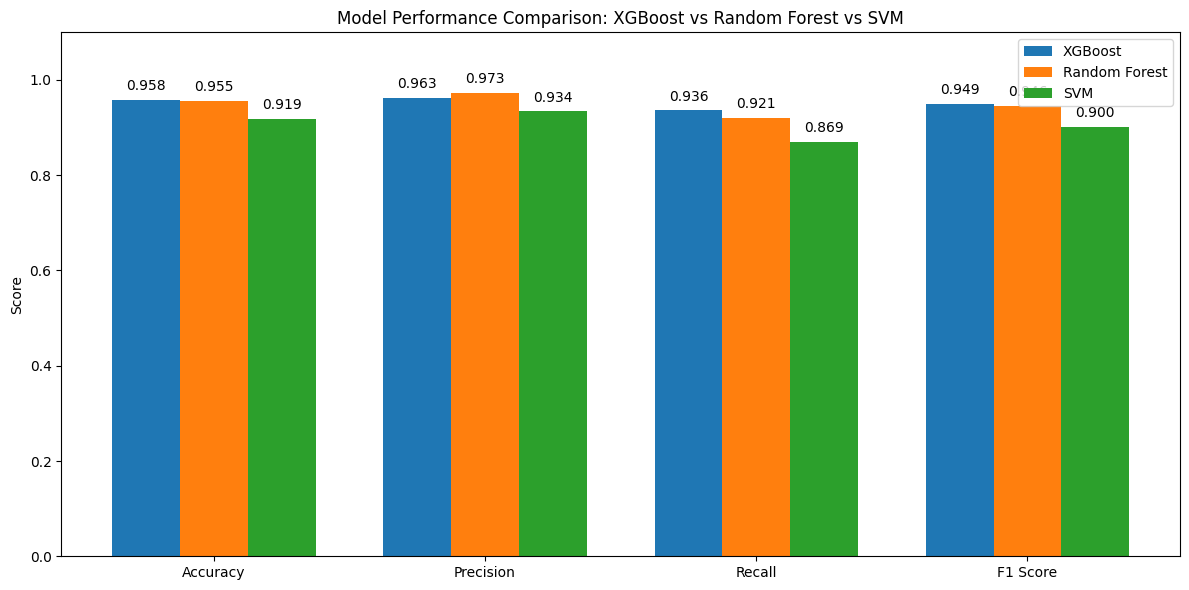

In [103]:
# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

svm_scores = [
    accuracy_score(y_test, svm_pred_sel),
    precision_score(y_test, svm_pred_sel),
    recall_score(y_test, svm_pred_sel),
    f1_score(y_test, svm_pred_sel)
]
rf_scores = [
    accuracy_score(y_test, rf_pred_sel),
    precision_score(y_test, rf_pred_sel),
    recall_score(y_test, rf_pred_sel),
    f1_score(y_test, rf_pred_sel)
]
xg_scores = [
    accuracy_score(y_test, xgb_pred_sel),
    precision_score(y_test, xgb_pred_sel),
    recall_score(y_test, xgb_pred_sel),
    f1_score(y_test, xgb_pred_sel)
]

x = np.arange(len(metrics))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width, xg_scores, width, label='XGBoost')
bars2 = ax.bar(x, rf_scores, width, label='Random Forest')
bars3 = ax.bar(x + width, svm_scores, width, label='SVM')

# Add values on top of bars (rounded to 3 decimals)
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom')

# Labels and styling
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison: XGBoost vs Random Forest vs SVM')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

plt.tight_layout()
plt.show()


# ROC-AUC

### ROC-AUC For SVM

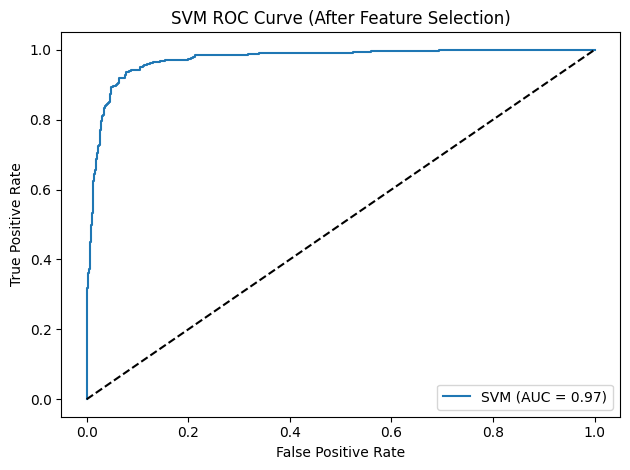

In [110]:

svm_probs_sel = svm_model_sel.predict_proba(X_test_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_test, svm_probs_sel)
auc = roc_auc_score(y_test, svm_probs_sel)

plt.figure()
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve (After Feature Selection)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


### ROC-AUC For XGBoost

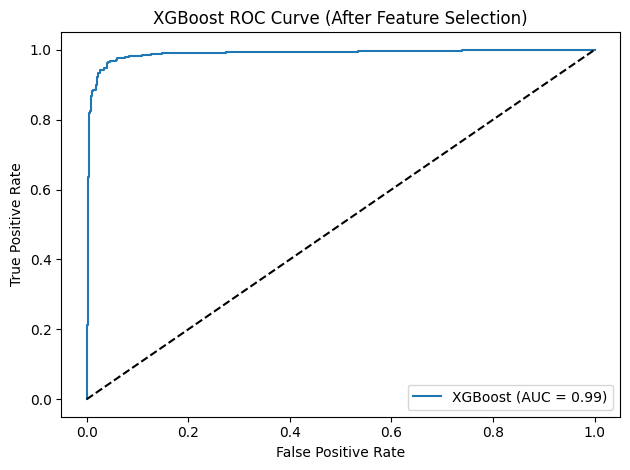

In [109]:

xgb_probs_sel = xgb_model_sel.predict_proba(X_test_selected_xgb)[:, 1]
fpr, tpr, _ = roc_curve(y_test, xgb_probs_sel)
auc = roc_auc_score(y_test, xgb_probs_sel)

plt.figure()
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve (After Feature Selection)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



### ROC-AUC for Random Forest

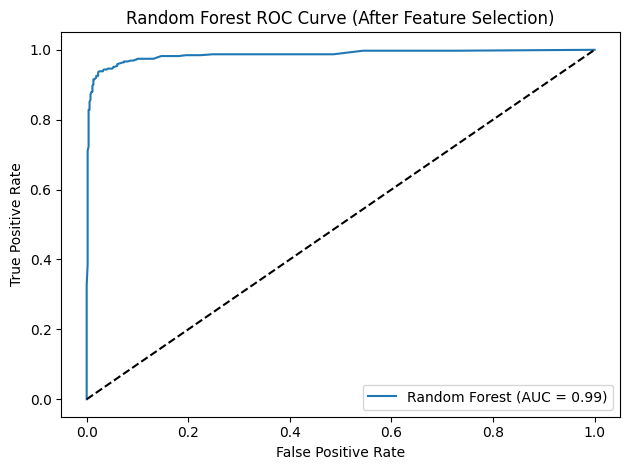

In [111]:
rf_probs_sel = rf_model_sel.predict_proba(X_test_selected_rf)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_probs_sel)
auc = roc_auc_score(y_test, rf_probs_sel)

plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve (After Feature Selection)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
